In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
readPath = 'Desktop/Data_Adrienne/Fluid Balance Data/'
ecgPath = 'Desktop/Data_Adrienne/Fluid Balance Figures/'

In [14]:
def plotData(df, xmin=0, xmax=900, ymin=-10, ymax=10, save=False, file_name='', title=''):
    plt.plot(df['Time (s)'], df['Transducer Output (mV)'])
    plt.xlim(xmin=xmin, xmax=xmax)
    plt.ylim(ymin=ymin, ymax=ymax)
    plt.xlabel('Time (s)')
    plt.ylabel('Transducer Output (mV)')
    plt.title(title)
    if save:
        plt.savefig(ecgPath + file_name, dpi=500)
    else:
        plt.show()

def getIndex(df, time1, time2):
    return df[df['Time (s)'].isin([time1, time2])]

def getSlope(df, index1, index2):
        m, b = np.polyfit(df.loc[index1:index2]['Time (s)'], df.loc[index1:index2]['Transducer Output (mV)'], 1)
        print('The slope is %.5f (mV/s)' % m)

def readFile(df, file_name=''):
    df = pd.read_csv(readPath + file_name,  sep='\t', error_bad_lines=False, header=None,)
    df.columns=['Time (s)', 'Transducer Output (mV)']
    print(df.dtypes)
    plotData(df, file_name=file_name)
    return df

# Perfusion Pressure

b'Skipping line 25: expected 2 fields, saw 3\nSkipping line 387: expected 2 fields, saw 3\nSkipping line 658: expected 2 fields, saw 3\n'


Time (s)                    int64
Transducer Output (mV)    float64
dtype: object


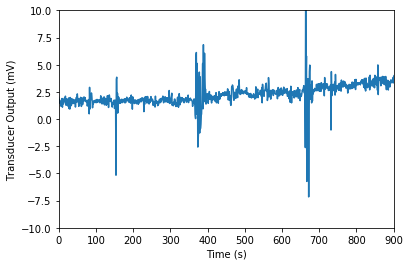

,Time (s),Transducer Output (mV)
0,0,1.999
1,1,1.574
2,2,1.795
3,3,1.456
4,4,1.560
...,...,...
926,929,3.680
927,930,3.846
928,931,2.827
929,932,4.827


In [17]:
readFile('perfusion', file_name ='Perfusion.txt')

In [20]:
plotData(perfusion, title='Perfusion Pressure', file_name='perfusionPressure.jpg', save=True)

NameError: name 'perfusion' is not defined

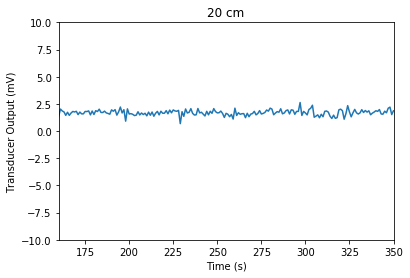

In [224]:
plotData(perfusion, xmin=160, xmax=350, ymin=-10, ymax=10, title='20 cm', save=True, file_name='perfusion20.jpg')

In [225]:
getIndex(perfusion, 160, 350)

,Time (s),Transducer Output (mV)
159,160,1.363
349,350,1.879


In [226]:
getSlope(perfusion, 159, 349)

The slope is 0.00023 (mV/s)


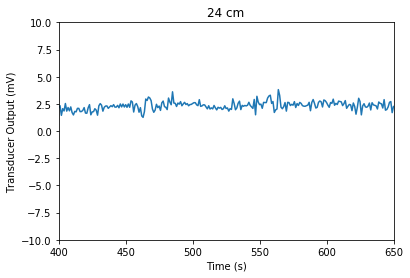

In [227]:
plotData(perfusion, xmin=400, xmax=650, ymin=-10, ymax=10, title='24 cm', save=True, file_name='perfusion24.jpg')

In [228]:
getIndex(perfusion, 400, 650)

,Time (s),Transducer Output (mV)
398,400,2.190
648,650,2.267


In [229]:
getSlope(perfusion, 398, 648)

The slope is 0.00152 (mV/s)


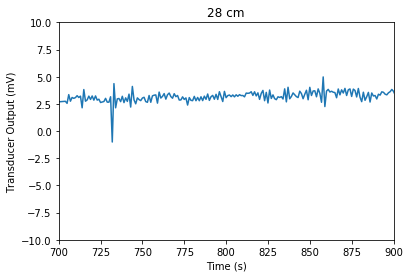

In [230]:
plotData(perfusion, xmin=700, xmax=900, ymin=-10, ymax=10, title='28 cm', save=True, file_name='perfusion28.jpg')

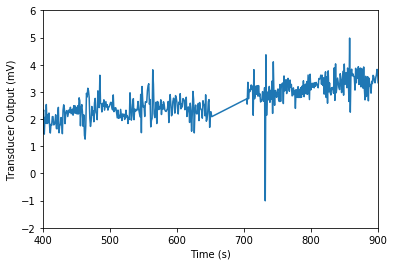

In [236]:
dropList = np.arange(651, 701, 1)

#perfusion.drop(dropList, axis=0, inplace=True)

plotData(perfusion, xmin=400, xmax=900, ymin=-2, ymax=6)

In [233]:
getIndex(perfusion, 750, 900)

,Time (s),Transducer Output (mV)
747,750,3.039
897,900,3.658


In [234]:
getSlope(perfusion, 747, 897)

The slope is 0.00334 (mV/s)


Text(0.5, 0.98, 'Perfusion Pressure')

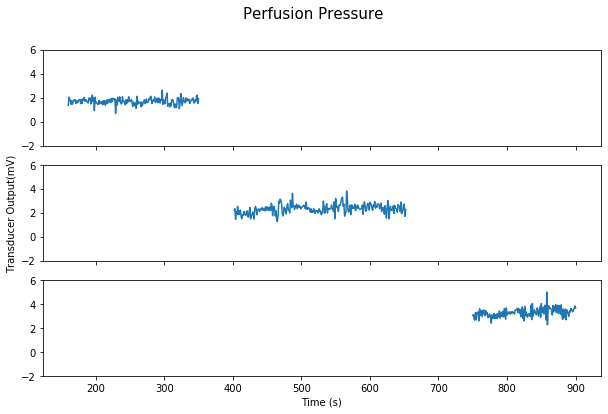

In [235]:
fig, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize=(10,6))
ax[0].plot(perfusion.loc[159:349]['Time (s)'], perfusion.loc[159:349]['Transducer Output (mV)'])
ax[1].plot(perfusion.loc[400:650]['Time (s)'], perfusion.loc[398:648]['Transducer Output (mV)'])
ax[2].plot(perfusion.loc[747:897]['Time (s)'], perfusion.loc[747:897]['Transducer Output (mV)'])
plt.xlabel('Time (s)')
ax[1].set_ylabel('Transducer Output(mV)')
ax[1].set_ylim(ymin=-2, ymax=6)
plt.suptitle('Perfusion Pressure', fontsize=15)

# Epinephrine

In [125]:
epi = pd.read_csv(readPath + 'epi.txt', sep='\t', header=None, error_bad_lines=False)

b'Skipping line 4: expected 2 fields, saw 3\nSkipping line 320: expected 2 fields, saw 3\nSkipping line 583: expected 2 fields, saw 3\n'


In [128]:
epi.columns=usualCols

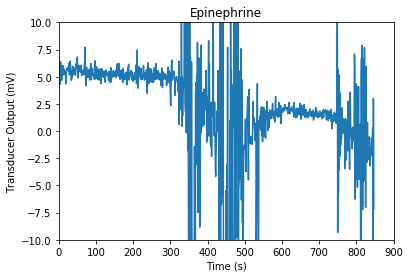

In [239]:
plotData(epi, title='Epinephrine', file_name='fbEpinephrine.jpg', save=True)

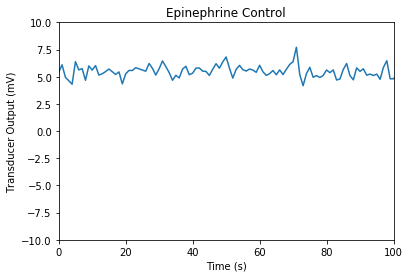

In [237]:
plotData(epi, xmin=0, xmax=100, title='Epinephrine Control', file_name='fbEpinephrineControl.jpg', save=True)

In [165]:
getIndex(epi, 0, 100)

,Time (s),Transducer Output (mV)
0,0,5.398
99,100,4.810


In [166]:
getSlope(epi, 0, 99)

The slope is -0.00156 (mV/s)


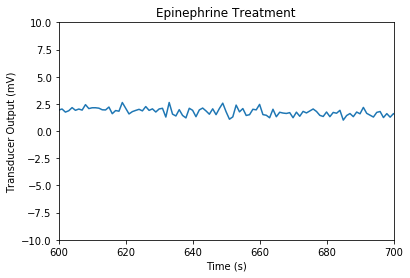

In [238]:
plotData(epi, xmin=600, xmax=700, title='Epinephrine Treatment', file_name='fbEpinephrineTreatment.jpg', save=True)

In [168]:
getIndex(epi, 600, 700)

,Time (s),Transducer Output (mV)
597,600,1.929
697,700,1.608


In [169]:
getSlope(epi, 597, 700)

The slope is -0.00532 (mV/s)
